# Revision Section

## Transfomations

1. **Translation**

$$
\begin{bmatrix}
x' \\ y'  \\ 1
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix} \begin{bmatrix}
x \\ y \\ 1
\end{bmatrix} 
$$


2. **Scaling**

$$
\begin{bmatrix}
x' \\ y'  \\ 1
\end{bmatrix} = 
\begin{bmatrix}
Sx & 0 & 0 \\
0 & Sy & 0 \\
0 & 0 & 1
\end{bmatrix} \begin{bmatrix}
x \\ y \\ 1
\end{bmatrix} 
$$




**Remember**
Fixed point scaling : $$P' = (T^{-1} ST)P$$



3. **Rotation**
$$
R_z(\theta) = 
\begin{bmatrix}
x' \\ y' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
cos(\theta) & -sin(\theta) & 0 \\
sin(\theta) & cos(\theta)  & 0 \\
0 &  0 & 1
\end{bmatrix} \begin{bmatrix}
x \\ y \\  1
\end{bmatrix} 
$$

**Remember** Fixed point rotaion:
$$
P' = (T^{-1} RT) P
$$

4. **Combined transformations** 

Scaling then translation $\rightarrow (TS)$

$$
\begin{bmatrix}
x' \\ y'  \\ 1
\end{bmatrix} = 
\begin{bmatrix}
Sx & 0 & tx \\
0 & Sy & ty \\
0 & 0 & 1
\end{bmatrix} \begin{bmatrix}
x \\ y \\ 1
\end{bmatrix} 
$$

Rotation then translation $\rightarrow (TR_z(\theta))$

$$
R_z(\theta) = 
\begin{bmatrix}
x' \\ y' \\ 1
\end{bmatrix} = 
\begin{bmatrix}
cos(\theta) & -sin(\theta) & tx \\
sin(\theta) & cos(\theta)  & ty \\
0 &  0 & 1
\end{bmatrix} \begin{bmatrix}
x \\ y \\  1
\end{bmatrix} 
$$


**Remember** : Homogeneous coordinates

### Q2 : (Sheet)

For each sequence of OpenGL like commands, sketch the resulting figure knowing that the function drawSquare() draws a square at origin with a width of 1.

* **a** 
```c++
drawSquare();
glTranslate(0,1,0);
glScale(0.5,0.5,1);
drawSquare();
glTranslate(0,1,0);
glScale(0.5,0.5,1);
drawSquare(); 
```
* **b**
```c++
drawSquare();
glPushMatrix();
    glTranslate(0,1,0);
    glScale(0.5,0.5,1);
    drawSquare();
glPopMatrix();
glPushMatrix();
    glTranslate(0,2,0);
    glScale(0.5,0.5,1);
    drawSquare();
glPopMatrix();
```

### Solution

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from IPython.core.debugger import set_trace
def plotShapes(shapes):
    for points in shapes:
        points = [p[:2] for p in points]
        plt.plot(*zip(*(points+points[:1])), marker='o')

        automin, automax = plt.xlim()
        plt.xlim(automin-0.7, automax+0.7)
        automin, automax = plt.ylim()
        plt.ylim(automin-0.7, automax+0.7)
    plt.show()

#### Part a

```c++
drawSquare();
glTranslate(0,1,0);
glScale(0.5,0.5,1);
drawSquare();
glTranslate(0,1,0);
glScale(0.5,0.5,1);
drawSquare(); 
```

**First Shape**
```c++
drawSquare(); //First shape CM=I, topStack => I
```

In [3]:
import numpy as np
shape = np.array([[ 0.5,  0.5, -0.5, -0.5],
                   [ 0.5, -0.5, -0.5,  0.5],
                   [  1 ,   1 ,   1 ,   1 ]])

In [4]:
shapes_a = []
shape1a = shape
shapes_a.append(shape1a.T)

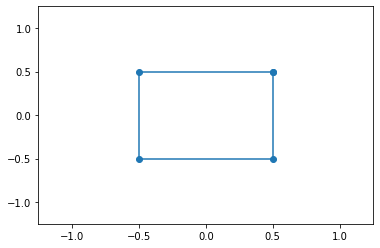

In [5]:
%matplotlib inline
plotShapes(shapes_a)

**Second Shape**

```c++
glTranslate(0,1,0); //T1
glScale(0.5,0.5,1); //S1
drawSquare(); // CMa1 = T1*S1, topStack = I
```

In [6]:
T1 = np.array([[1, 0, 0],
               [0, 1, 1],
               [0, 0, 1]
              ])
S1 = np.array([[0.5, 0,  0],
               [ 0, 0.5, 0],
               [ 0,  0,  1]
              ])
CMa1 = T1.dot(S1) # OR use combined transformation note
CMa1

array([[0.5, 0. , 0. ],
       [0. , 0.5, 1. ],
       [0. , 0. , 1. ]])

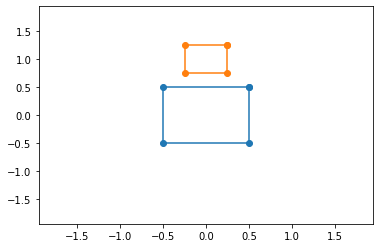

In [7]:
shape2a = CMa1.dot(shape1a)
shapes_a.append(shape2a.T)
plotShapes(shapes_a)

In [9]:
print(shape2a)


[[ 0.25  0.25 -0.25 -0.25]
 [ 1.25  0.75  0.75  1.25]
 [ 1.    1.    1.    1.  ]]


**Third Shape**

```c++
glTranslate(0,1,0);// T1 
glScale(0.5,0.5,1); // S1
drawSquare(); // CMa2 = CMa1*T1*S1, topStack = I
```

In [10]:
CMa2 = CMa1.dot(T1).dot(S1)
CMa2

array([[0.25, 0.  , 0.  ],
       [0.  , 0.25, 1.5 ],
       [0.  , 0.  , 1.  ]])

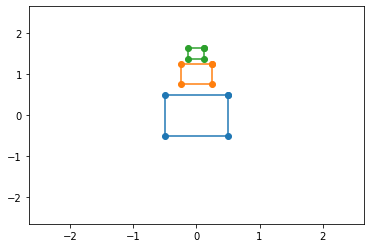

In [11]:
shape3a = CMa2.dot(shape1a)
shapes_a.append(shape3a.T)
plotShapes(shapes_a)

In [12]:
shape3a

array([[ 0.125,  0.125, -0.125, -0.125],
       [ 1.625,  1.375,  1.375,  1.625],
       [ 1.   ,  1.   ,  1.   ,  1.   ]])

#### Part b
**First Shape**
```c++
drawSquare(); //First shape CM=I, topStack => I
```

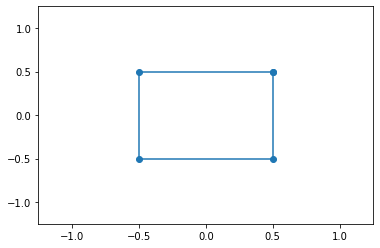

In [13]:
shapes = []
shapes.append(shape.T)
plotShapes(shapes)

**Second Shape**
```c++
glPushMatrix(); // CM = I, topStack = I
    glTranslate(0,1,0); //T1
    glScale(0.5,0.5,1); //S1
    drawSquare(); //Second shape CM = T1*S1, topStack = I
```

In [14]:
T1 = np.array([[1, 0, 0],
               [0, 1, 1],
               [0, 0, 1]
              ])
S1 = np.array([[0.5, 0,  0],
               [ 0, 0.5, 0],
               [ 0,  0,  1]
              ])
CM1 = T1.dot(S1)
print(CM1)

[[0.5 0.  0. ]
 [0.  0.5 1. ]
 [0.  0.  1. ]]


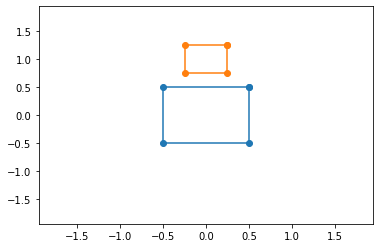

In [15]:
shape2 = CM1.dot(np.asarray(shape))
shapes.append(shape2.T)
plotShapes(shapes)

**Third Shape**
```c++
glPopMatrix();  // CM = I, topStack = I
glPushMatrix(); // CM = I , topStack = I
    glTranslate(0,2,0); //T2
    glScale(0.5,0.5,1); //S2 = S1
    drawSquare();  // Third Shape CM = T2*S2 topStack = I
glPopMatrix(); // CM = I, topStack = I
```

In [16]:
T2 = np.array([[1, 0, 0],
               [0, 1, 2],
               [0, 0, 1]])

S2 = S1
CM2 = T2.dot(S2)
CM2

array([[0.5, 0. , 0. ],
       [0. , 0.5, 2. ],
       [0. , 0. , 1. ]])

In [17]:
shape3 = CM2.dot(np.asarray(shape))
shapes.append(shape3.T)

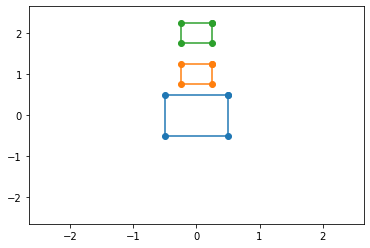

In [18]:
plotShapes(shapes)

### Exam Problem 

![](images/img1.png)
![](images/img2.png)

### Solution

![](images/img3.png)

```c++
void drawShape(void) {
glBegin(GL_POLYGON);
    glVertex3f(0.0,0.0,0.0);
    glVertex3f(2.0,0.0,0.0);
    glVertex3f(2.0,1.0,0.0);
    glVertex3f(1.0,1.0,0.0);
    glVertex3f(1.0,3.0,0.0);
    glVertex3f(0.0,3.0,0.0);
glEnd();
}
```

In [19]:
from IPython.core.debugger import set_trace
def plotShapes(shapes):
    for points in shapes:
        points = [p[:2] for p in points]
        plt.plot(*zip(*(points+points[:1])), marker='o')

        autominX, automaxX = plt.xlim()
        autominY, automaxY = plt.ylim()
        automin = min(autominX, autominY)
        automax = max(automaxX, automaxY)

        plt.xlim(automin-2, automax+2)
        plt.ylim(automin-2, automax+2)
    plt.show()

**Shape 1** 
```c++
glPushMatrix();
drawShape(); //shape 1, CM1 = I, topStack = I
```

In [20]:
shapes = []
shape1 = np.array([[0, 2, 2, 1, 1, 0],
                   [0, 0, 1, 1, 3, 3],
                   [1, 1, 1, 1, 1, 1]])
shapes.append(shape1.T)

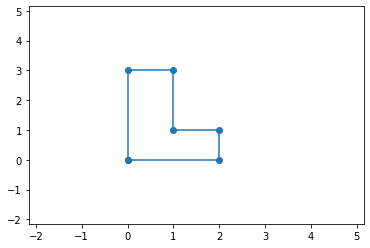

In [21]:
%matplotlib inline
plotShapes(shapes)

**Shape 2** 
```c++
glRotatef(90, 0, 0, 1); // R1
glTranslatef(1, 0, 0); // T1
drawShape(); // shape 2 => CM2 = R1*T1, topStack = I
```

In [22]:
R1 = np.array([[ 0, -1, 0],
               [ 1, 0, 0],
               [ 0, 0, 1]
              ])

T1 = np.array([[ 1, 0, 1],
               [ 0, 1, 0],
               [ 0, 0, 1]
              ])
CM2 = R1.dot(T1)
print(CM2)
shape2  = CM2.dot(shape1)
shapes.append(shape2.T)

[[ 0 -1  0]
 [ 1  0  1]
 [ 0  0  1]]


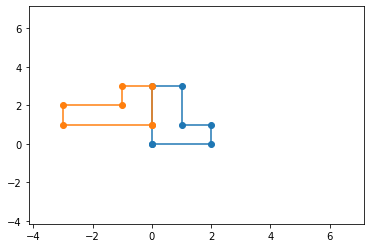

In [23]:
%matplotlib inline
plotShapes(shapes)

**Shape 3** 
```c++
glRotatef(-90, 0, 0, 1); //R2
glPushMatrix(); // CM = CM2*R2, topStack = CM2*R2
glTranslatef(1, 0, 0); //T2 = T1
drawShape(); //shape 3 CM3 = CM2*R2*T1
```

In [24]:
R2 = np.array([[ 0, 1, 0],
               [ -1, 0, 0],
               [ 0, 0, 1]
              ])


CM3 = CM2.dot(R2).dot(T1)
print(CM3)
shape3  = CM3.dot(shape1)
shapes.append(shape3.T)

[[1 0 1]
 [0 1 1]
 [0 0 1]]


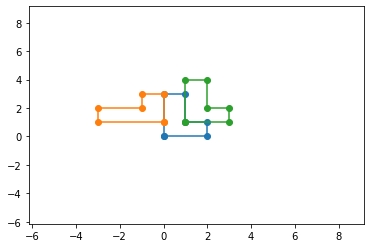

In [25]:
%matplotlib inline
plotShapes(shapes)

In [26]:
topStack = CM2.dot(R2)

**Shape 4** 
```c++
glScalef(1, 2, 1); // S1
glTranslatef(1, -2, 0);  // T3 
drawShape(); // shape 4, CM = CM3*S1*T3, topStack = CM2*R2
```

In [27]:
S1 = np.array([[ 1, 0, 0],
               [ 0, 2, 0],
               [ 0, 0, 1]
              ])

T3 = np.array([[ 1, 0, 1],
               [ 0, 1, -2],
               [ 0, 0, 1]
              ])


CM4 = CM3.dot(S1).dot(T3)
print(CM4)
shape4  = CM4.dot(shape1)
shapes.append(shape4.T)

[[ 1  0  2]
 [ 0  2 -3]
 [ 0  0  1]]


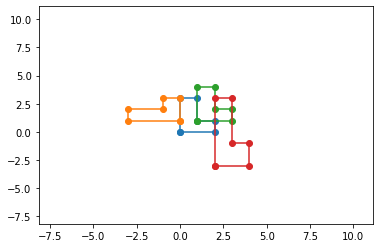

In [28]:
%matplotlib inline
plotShapes(shapes)

**Shape 5** 
```c++
glTranslatef(-2, 2, 0); // T4
glRotatef(90, 0, 0, 1); //R1 
glTranslatef(-1, -1, 0); // T5
glScalef(1, .5, 1); // S2
glRotatef(90, 0, 0, 1); // R1 (CM = CM4*T4*R1*T5*S2*R1)
glPopMatrix(); // CM = topStack (topStak = CM2*R2), topStack = I
glTranslatef(-2, 1, 0);// T6
drawShape(); // shape 5, CM5 = CM2*R2*T6, topStack = I
glPopMatrix(); // CM = I, topStack = I
```

In [29]:
topStack = CM2.dot(R2)
T6 = np.array([[ 1, 0, -2],
               [ 0, 1, 1],
               [ 0, 0, 1]
              ])


CM5 = topStack.dot(T6)
print(CM5)
shape5  = CM5.dot(shape1)
shapes.append(shape5.T)

[[ 1  0 -2]
 [ 0  1  2]
 [ 0  0  1]]


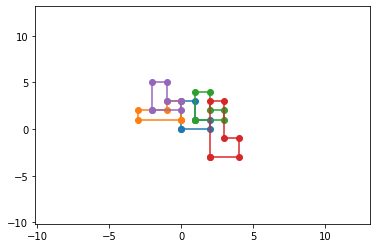

In [30]:
%matplotlib inline
plotShapes(shapes)

In [31]:
topStack = np.eye(3)
CM = np.eye(3)

In [32]:
print(topStack)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [33]:
print(CM)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Projection 

From 3D space to 2D plane

### Parallel Projection (Orthogonal)

* Preserves the parallelism

```c++
void glOrtho(GLdouble left,
             GLdouble right,
             GLdouble bottom,
             GLdouble top,
             GLdouble nearVal,
             GLdouble farVal);
```
**Effect of changing near and far planes ??**

<span style="color:red">No effect</span>.

### Perspective Projection

* Does not preserve parallelism 
* Nearer objects appears bigger

* glFrustum

```c++
void glFrustum(	GLdouble left,
 	GLdouble right,
 	GLdouble bottom,
 	GLdouble top,
 	GLdouble nearVal,
 	GLdouble farVal);
```
**Effect of changing near and far planes ??**

<span style="color:red">
ZNear $\downarrow$ Object size $\downarrow$

Far : No effect
</span>.

* gluPerspective
```c++
void gluPerspective(	GLdouble fovy,
 	GLdouble aspect,
 	GLdouble zNear,
 	GLdouble zFar);
```
**Effect of changing fovy, near, far ??**

<span style="color:red">
Fovy $\downarrow$ Object size $\uparrow$

Far, Near : No effect
</span>.

## Pipeline

The pipeline simply includes

1. 3D Modeling (Primitives or vertices) Model **(World Coordinates)**

2. Lightening and coloring calculations

3. Transform to 3D camera coordinates View **(Camera Coordinates)**

4. Clip to 2D Screen coordinates Projection **(Sceen Coordinate)**


## Camera 

```c++
void gluLookAt(GLdouble eyeX,
 	GLdouble eyeY,
 	GLdouble eyeZ,
 	GLdouble centerX,
 	GLdouble centerY,
 	GLdouble centerZ,
 	GLdouble upX,
 	GLdouble upY,
 	GLdouble upZ);
```

What do we care about in up vector ? (magnitude or direction)

## Illumination and shapding

###  Lighting

* Ambient lighting : approximation of uniform light without light source.
* Diffuse lighting : Reflected in all direction due to roughness of the surface.
* Specular lighting: Reflection of the light in one direction (Smooth surface).

### Light sources

* Point (Positional) 
* Directional    **position ??**

### Shading 

* Flat 
* Smooth

## Important Concepts 

* Ray Casting and Ray tracing
* Depth buffer
* Double buffering 